In [1]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cv2
from ipywidgets import *

In [2]:
%matplotlib inline

In [3]:
PATH_TO_IMAGE =  '../data_store/2022-10-10_1433_testrecon/2022-10-10_1433_testrecon_result.tif'
im = io.imread(PATH_TO_IMAGE)
# (no. of projections, length, width)
print(im.shape)

(400, 365, 273)


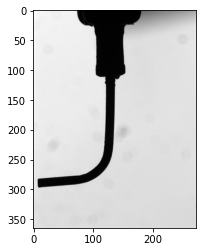

In [4]:
plt.imshow(im[0], cmap='gray')

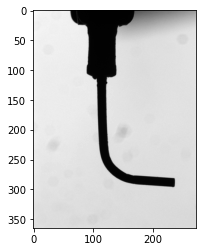

In [5]:
plt.imshow(im[int(len(im)/2)], cmap='gray')

In [6]:
# adapted from: https://stackoverflow.com/a/58142700

def recolour_image(before, bgr=[1.5, 0.75, 1.25]):
    before = cv2.cvtColor(before, cv2.COLOR_GRAY2BGR)
    b, g, r = cv2.split(before)

    np.multiply(b, bgr[0], out=b, casting="unsafe")
    np.multiply(g, bgr[1], out=g, casting="unsafe")
    np.multiply(r, bgr[2], out=r, casting="unsafe")

    after = cv2.merge([b, g, r])
    
    return after

In [7]:
def overlay_images(img1=im[0], img2=im[int(len(im)/2)], translation=-25):
    M = np.float32([
        [1, 0, translation],
        [0, 1, 0]
    ])
    
    img_0 = recolour_image(img1, bgr=[0, 0, 255])
    img_180 = np.fliplr(recolour_image(img2, bgr=[0, 255, 0]))
    img_180_shift = cv2.warpAffine(img_180, M, (img_180.shape[1], img_180.shape[0]))
    blended = cv2.addWeighted(img_0, 0.5, img_180_shift, 0.5, 0.0)
    blended = cv2.cvtColor(blended, cv2.COLOR_BGR2RGB)
    
    return blended

In [8]:
blended = overlay_images()

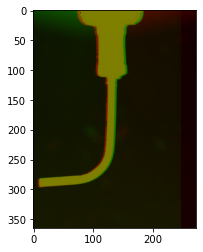

In [9]:
plt.imshow(blended)

In [10]:
%matplotlib notebook

In [11]:
# # NON-INTERACTIVE ANIMATION

# fig = plt.figure()

# translation = -50

# anim_img = plt.imshow(overlay_images(translation=translation), animated=True)

# def updatefig(*args):
#     global translation
#     translation += 1
#     anim_img.set_array(overlay_images(translation=translation))
#     return anim_img,

# ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True)
# plt.show()

<IPython.core.display.Javascript object>


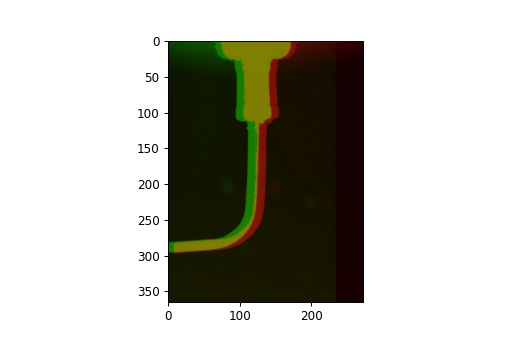

interactive(children=(IntSlider(value=-50, description='translation', max=50, min=-150), Output()), _dom_class…

In [12]:
# INTERACTIVE VERSION

fig = plt.figure()

translation = -50

anim_img = plt.imshow(overlay_images(translation=translation), animated=True)

def updatefig(translation=-50):
    anim_img.set_array(overlay_images(translation=translation))
    fig.canvas.draw_idle()

interact(updatefig);
plt.show()